In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
df = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1259, 28)


,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()
df.describe(include='all').T
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1259 non-null   int64 
 1   Timestamp                  1259 non-null   object
 2   Age                        1259 non-null   int64 
 3   Gender                     1259 non-null   object
 4   Country                    1259 non-null   object
 5   state                      744 non-null    object
 6   self_employed              1241 non-null   object
 7   family_history             1259 non-null   object
 8   treatment                  1259 non-null   object
 9   work_interfere             995 non-null    object
 10  no_employees               1259 non-null   object
 11  remote_work                1259 non-null   object
 12  tech_company               1259 non-null   object
 13  benefits                   1259 non-null   object
 14  care_opt

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Age                             0
Timestamp                       0
Country                         0
family_history                  0
treatment                       0
no_employees                    0
index                           0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

In [4]:
# Filter out unrealistic ages
df = df[(df['Age'] >= 16) & (df['Age'] <= 100)]


In [5]:
def clean_gender(gender):
    gender = str(gender).lower().strip()
    if gender in ['male', 'm', 'man', 'cis male', 'male-ish', 'msle', 'malr', 'mail']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'femake', 'female (cis)', 'femail']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
df['Gender'].value_counts()


Gender
Male      978
Female    246
Other      27
Name: count, dtype: int64

In [6]:
# Drop rows with missing key information
df.dropna(subset=['Gender', 'Country', 'treatment'], inplace=True)

# Fill missing values in less critical fields
df['self_employed'] = df['self_employed'].fillna('No')
df['work_interfere'] = df['work_interfere'].fillna('Not applicable')


In [7]:
print("Cleaned dataset shape:", df.shape)
df.isnull().sum()


Cleaned dataset shape: (1251, 28)


index                           0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
dtype: int64

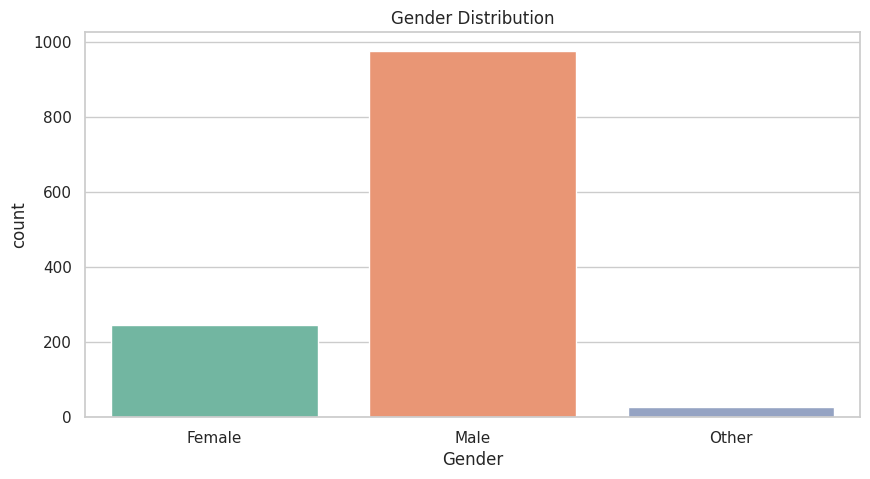

In [8]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()


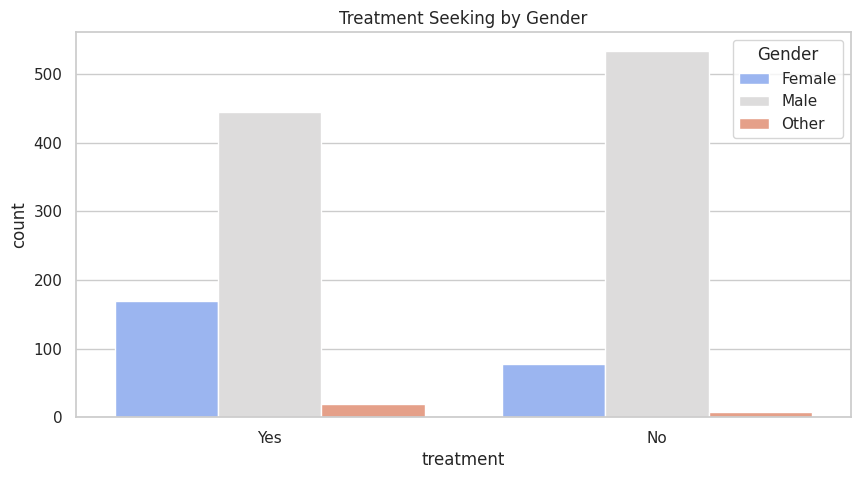

In [9]:
sns.countplot(data=df, x='treatment', hue='Gender', palette='coolwarm')
plt.title("Treatment Seeking by Gender")
plt.show()


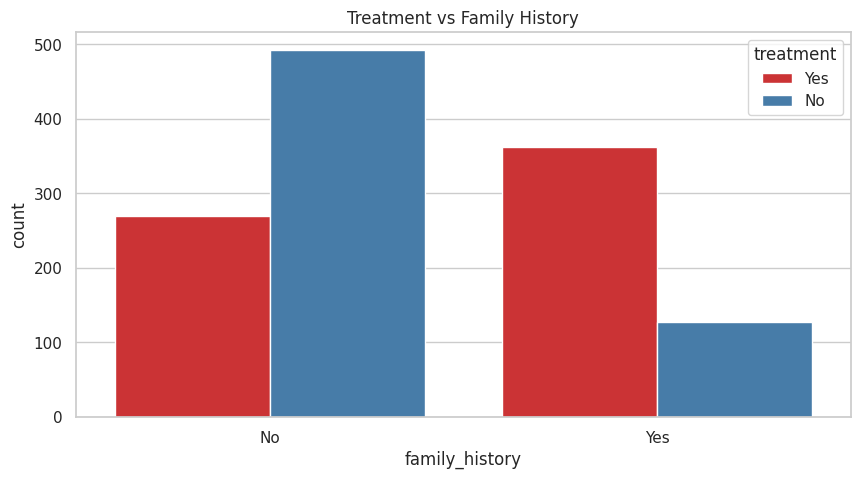

In [10]:
sns.countplot(data=df, x='family_history', hue='treatment', palette='Set1')
plt.title("Treatment vs Family History")
plt.show()


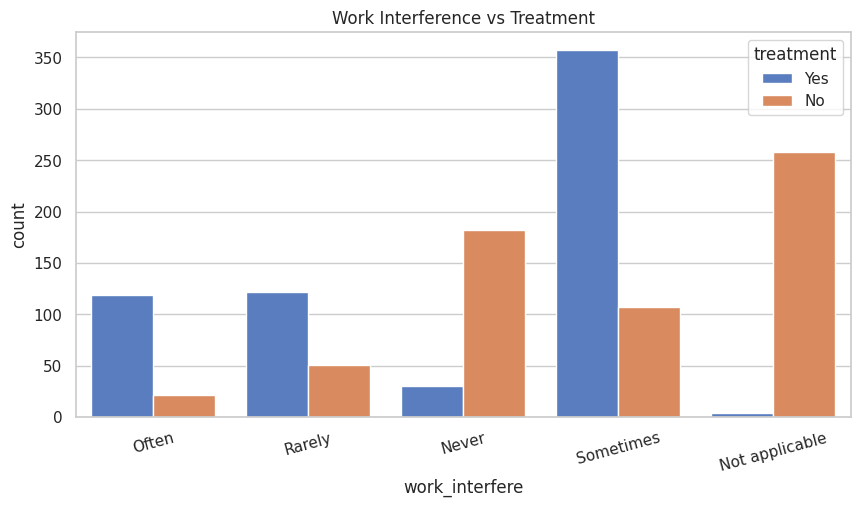

In [11]:
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='muted')
plt.title("Work Interference vs Treatment")
plt.xticks(rotation=15)
plt.show()


In [12]:
df.to_csv("/kaggle/working/survey_cleaned.csv", index=False)
print("Cleaned dataset exported as survey_cleaned.csv")


Cleaned dataset exported as survey_cleaned.csv
